In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# NPL
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/daniel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("../data/5minCrafts_video_data_UP.csv") 
df.shape

(6688, 20)

In [3]:
df.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,0,_lpfFbYnbOM,5-Minute Crafts,Illuminate Your World with Rock Art! 🌟✨ #shorts,Get Your Rock Painting Kit Now at Walmart! ➡️ ...,"['5 minute craft', '5 minutes craft', '5-minut...",2023-11-17 17:00:35+00:00,11513.0,638.0,NaN,4.0,PT31S,hd,False,Friday,31.0,20,55.415617,0.347433,47
1,1,NAW3bdt3xh8,5-Minute Crafts,Easy School Crafts for Creative Students 📚✂️,Hi friends! 🧩🍭 Welcome to our creative corner!...,"['5 minute craft', '5 minutes craft', '5-minut...",2023-11-17 13:00:19+00:00,25981.0,309.0,NaN,25.0,PT1H49S,hd,False,Friday,3649.0,32,11.893307,0.962242,44
2,2,fgUr6kfnv9c,5-Minute Crafts,DIY Jewelry Ideas ✨💍Unique Accessories You Can...,Hi everyone! 🤩🤗 Welcome to a world of creativi...,"['5 minute craft', '5 minutes craft', '5-minut...",2023-11-17 11:00:40+00:00,15873.0,212.0,NaN,13.0,PT8M59S,hd,False,Friday,539.0,32,13.356013,0.819001,59
3,3,B_x5rqgxqmc,5-Minute Crafts,🌟✂️ 5-Minute Crafts Historic Event! ✂️🌟 #short...,🌟✂️ 5-Minute Crafts Historic Event! ✂️🌟\r\n🛒 N...,"['5 minute craft', '5 minutes craft', '5-minut...",2023-11-16 15:00:09+00:00,70549.0,1511.0,NaN,7.0,PT15S,hd,False,Thursday,15.0,20,21.417738,0.099222,80
4,4,tyLhe5QnebM,5-Minute Crafts,Delicious Snack and Treat Ideas That Are Quick...,Hi everyone! 💗🍭 Join us in this mouthwatering ...,"['5 minute craft', '5 minutes craft', '5-minut...",2023-11-16 13:00:48+00:00,48395.0,437.0,NaN,30.0,PT1H2S,hd,False,Thursday,3602.0,35,9.029858,0.619899,66


## EDA

### Best performing video

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127852 (\N{CANDY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129327 (\N{SHOCKED FACE WITH EXPLODING HEAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


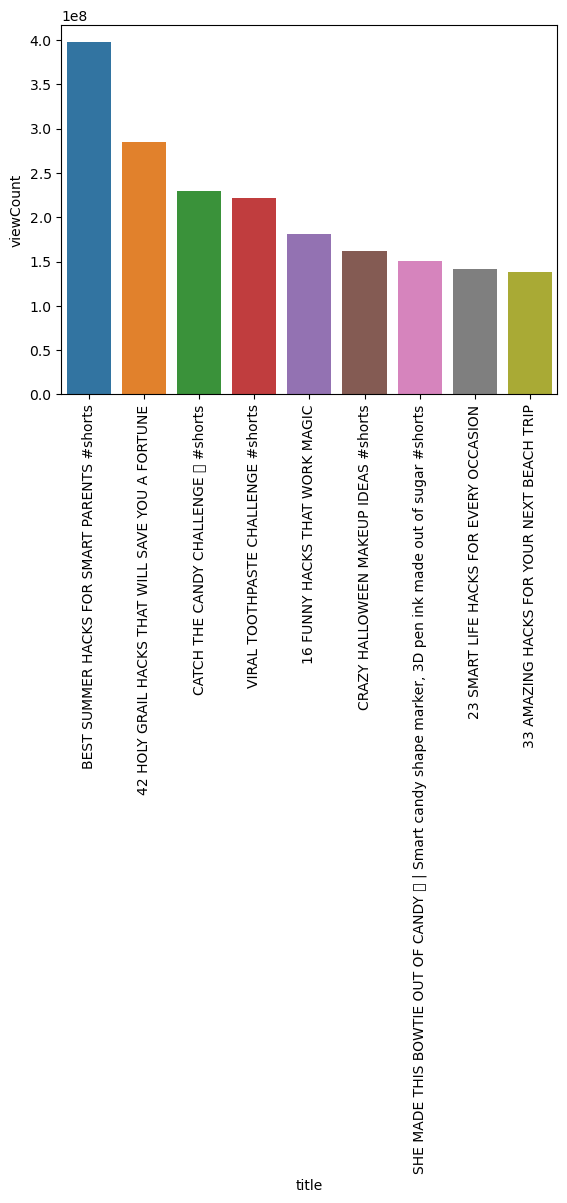

In [4]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### worst performing video

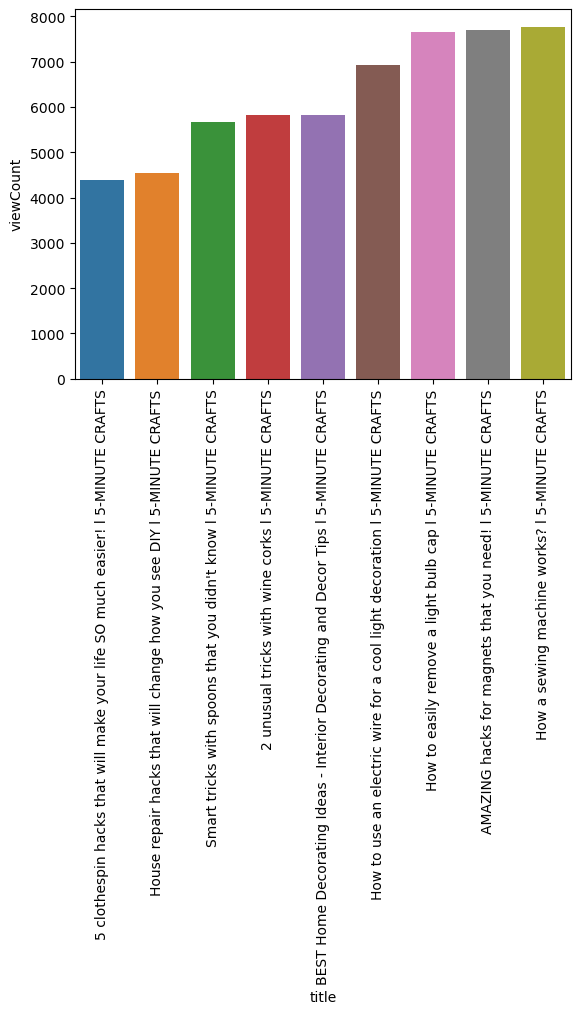

In [5]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### video distribution per video

<AxesSubplot:xlabel='channelTitle', ylabel='viewCount'>

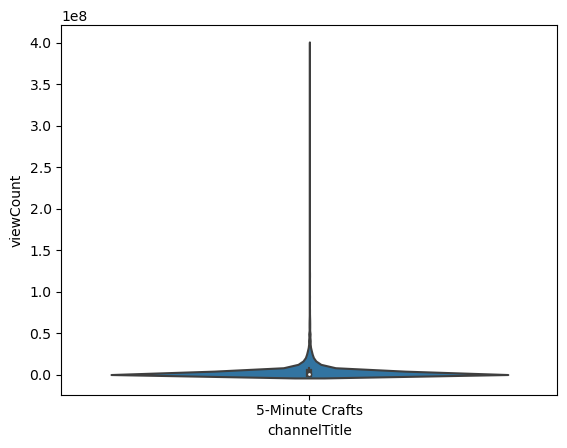

In [6]:
sns.violinplot(data=df, x='channelTitle', y='viewCount')

### views vs. likes and comments

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

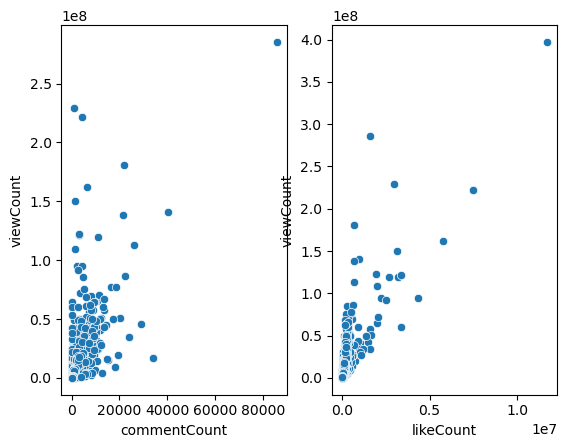

In [7]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data=df, x = 'commentCount', y='viewCount', ax = ax[0])
sns.scatterplot(data=df, x = 'likeCount', y='viewCount', ax = ax[1])

### video duration

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

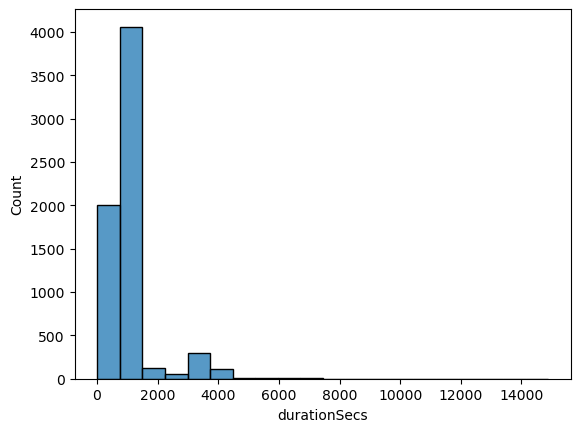

In [8]:
sns.histplot(data = df, x = 'durationSecs', bins=20)

### wordcloud for video title

In [9]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

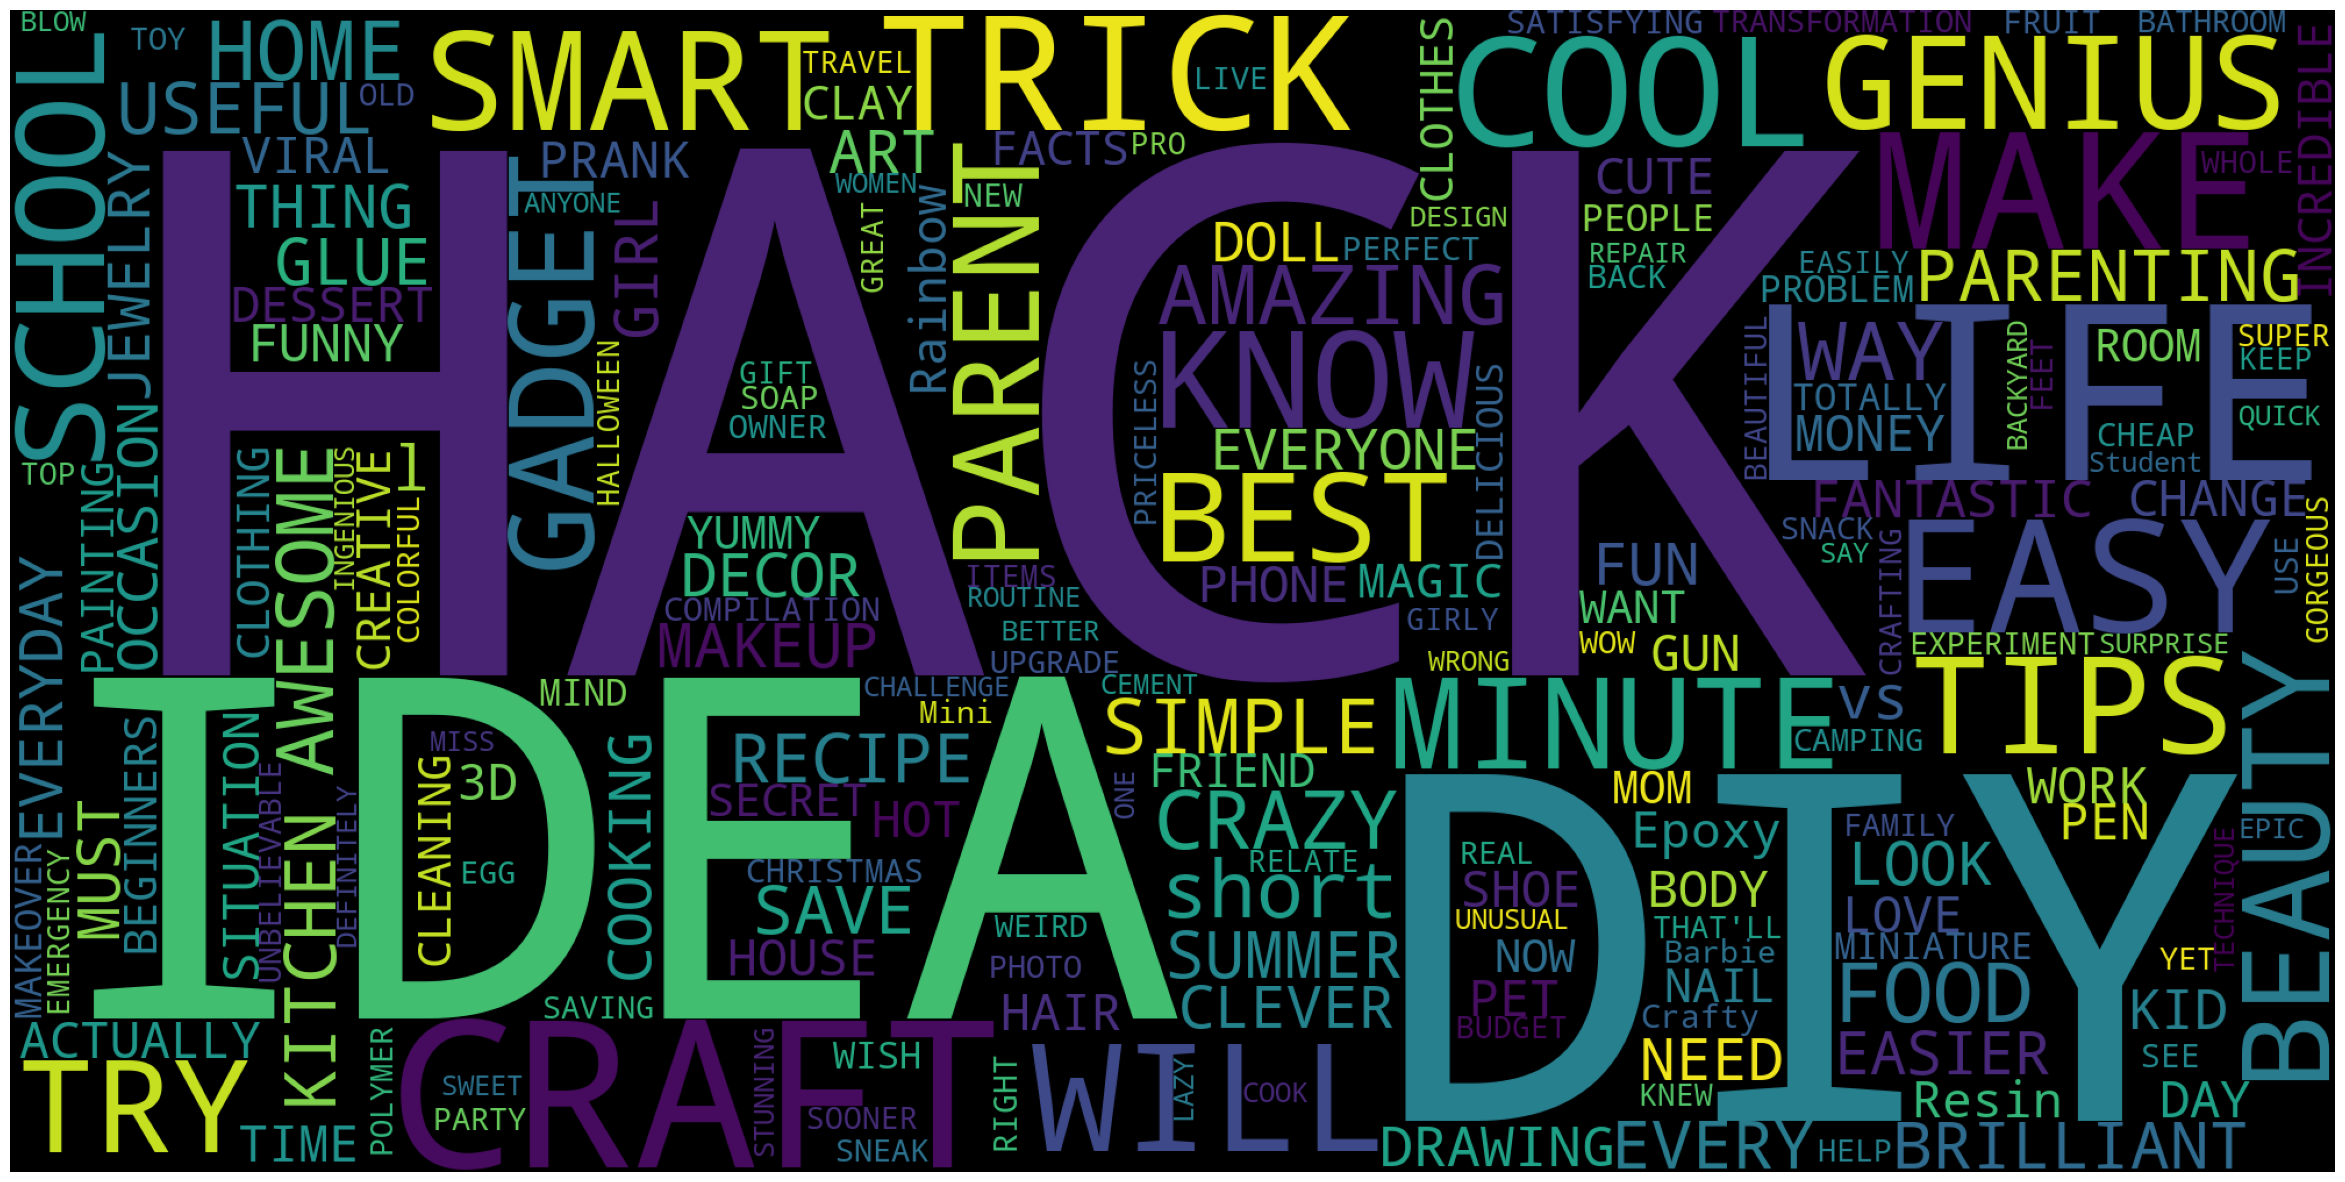

In [10]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### number of tags vs views

<AxesSubplot:xlabel='tagsCount', ylabel='viewCount'>

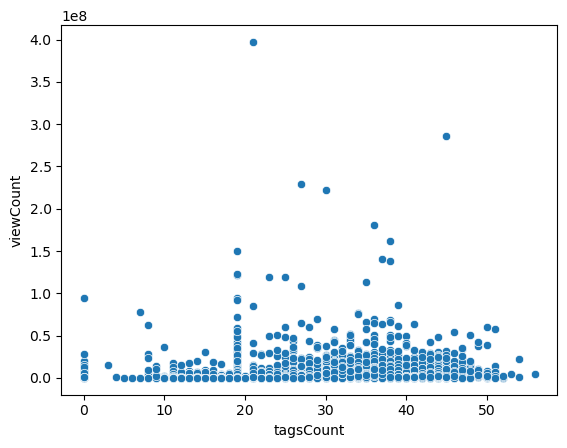

In [11]:
sns.scatterplot(data = df, x = "tagsCount", y = "viewCount")

### which days in the week are most videos uploaded?

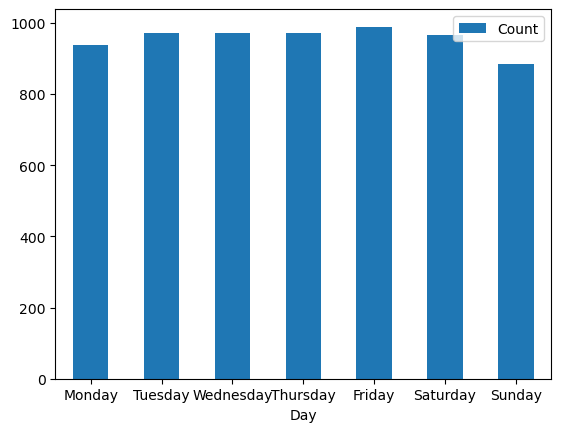

In [12]:
day_df = pd.DataFrame(df['pushblishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
day_df.reset_index(inplace=True)
day_df.columns = ['Day', 'Count']

# Create a bar plot
ax = day_df.plot.bar(x='Day', y='Count', rot=0)

# Show the plot
plt.show()

### wordcloud for video comment

In [13]:
comments_df = pd.read_csv("../data/5minCrafts_comments_data.csv")

stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

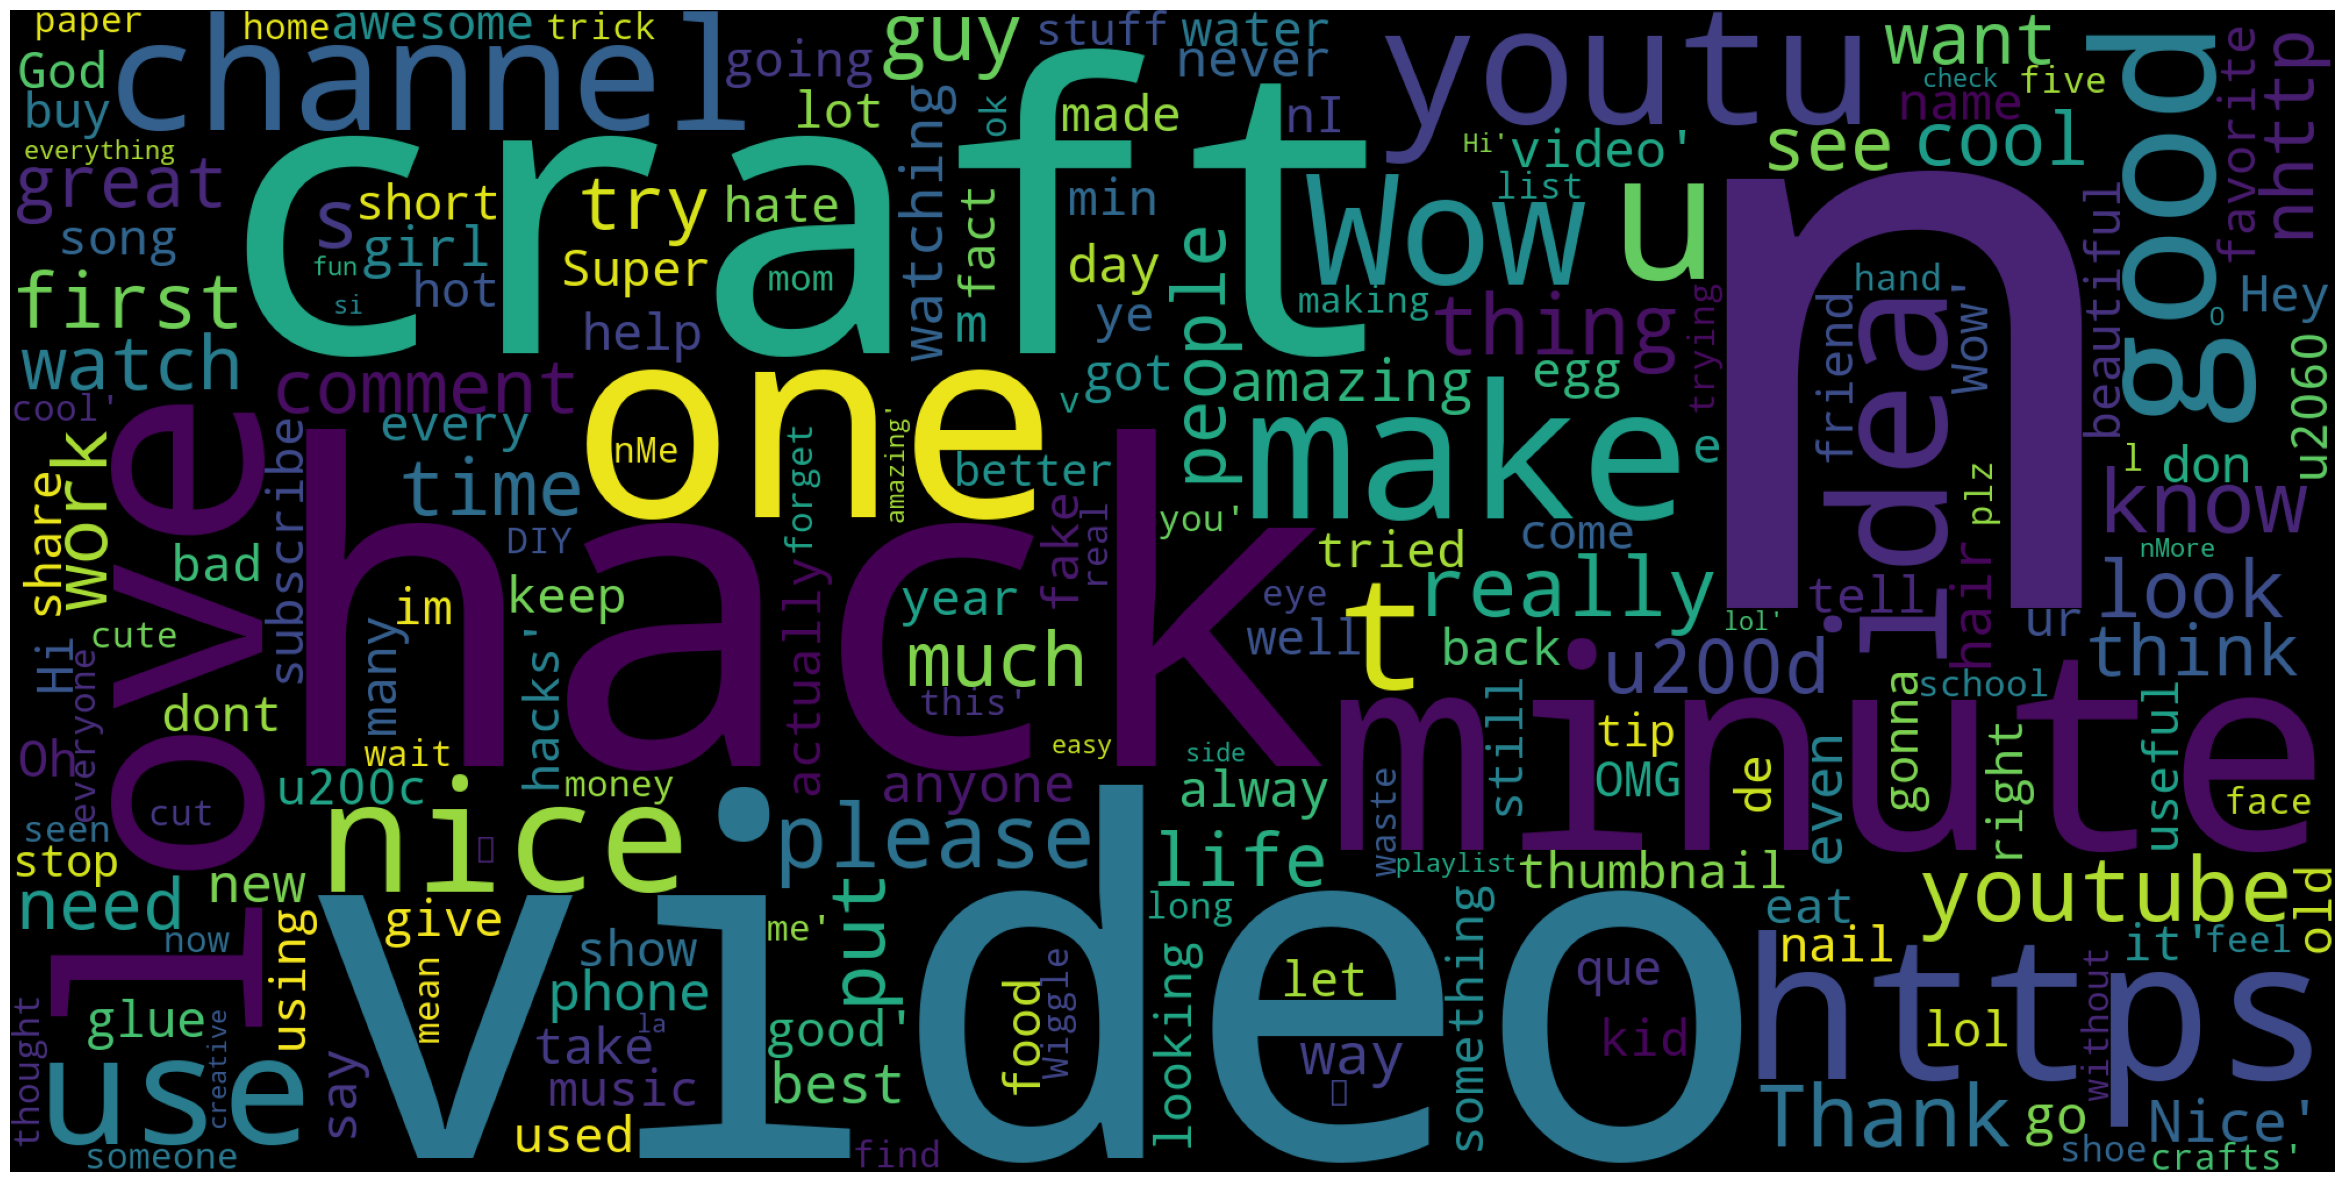

In [14]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)